In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.shape 

(303, 14)

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


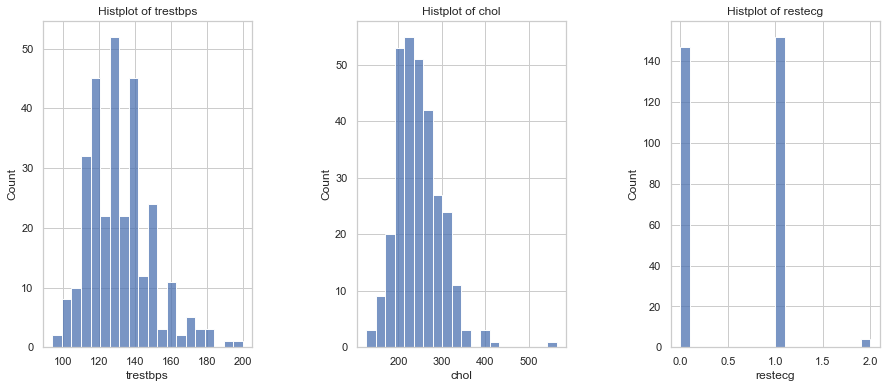

In [28]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['trestbps','chol','restecg']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.histplot(df[x],bins=20)
    plt.title('Histplot of {}'.format(x))
plt.show()

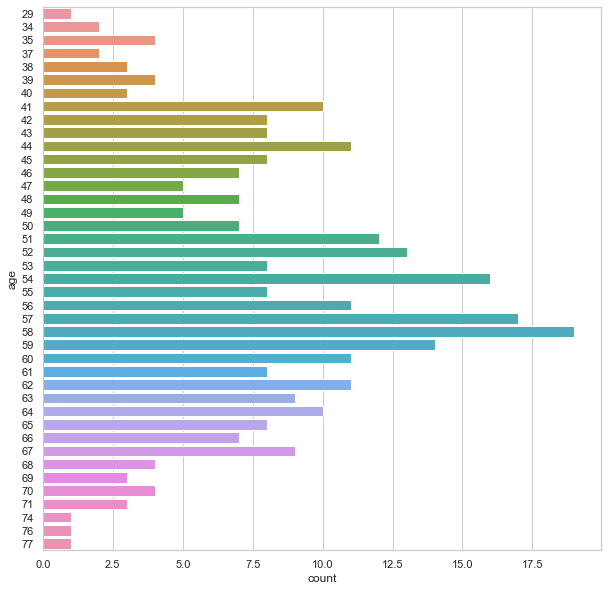

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(y='age',data=df)
plt.show()

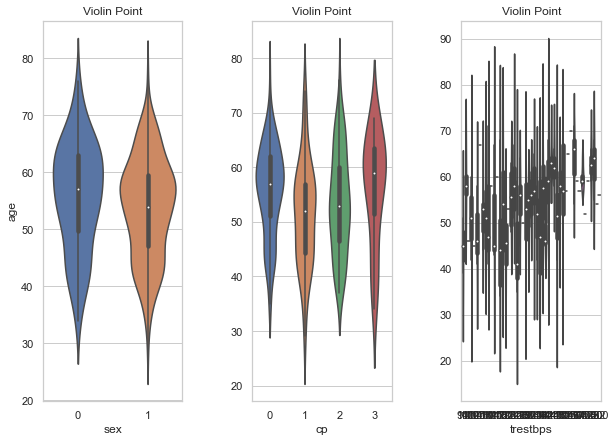

In [30]:
plt.figure(1,figsize=(10,7))
n=0
for cols in ['sex','cp','trestbps']:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='age',data=df)
    plt.ylabel('age' if n==1 else'')
    plt.title('Violin Point')
plt.show()

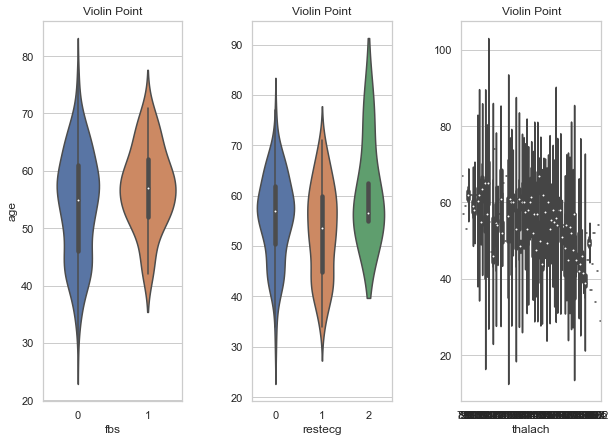

In [31]:
plt.figure(1,figsize=(10,7))
n=0
for cols in ['fbs','restecg','thalach']:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='age',data=df)
    plt.ylabel('age' if n==1 else'')
    plt.title('Violin Point')
plt.show()

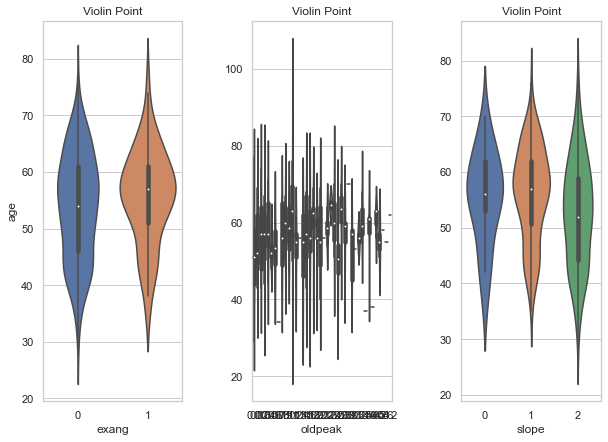

In [32]:
plt.figure(1,figsize=(10,7))
n=0
for cols in ['exang','oldpeak','slope']:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='age',data=df)
    plt.ylabel('age' if n==1 else'')
    plt.title('Violin Point')
plt.show()

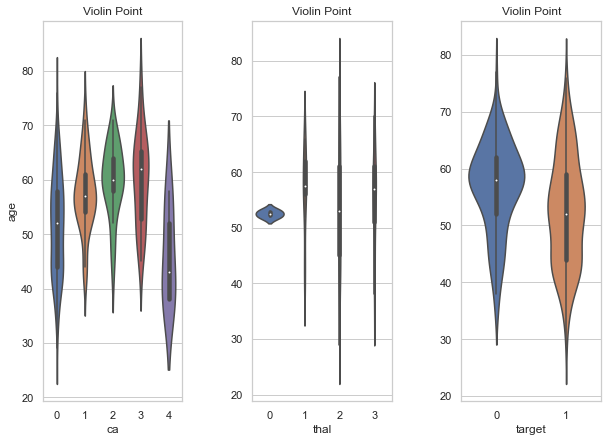

In [33]:
plt.figure(1,figsize=(10,7))
n=0
for cols in ['ca','thal','target']:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='age',data=df)
    plt.ylabel('age' if n==1 else'')
    plt.title('Violin Point')
plt.show()

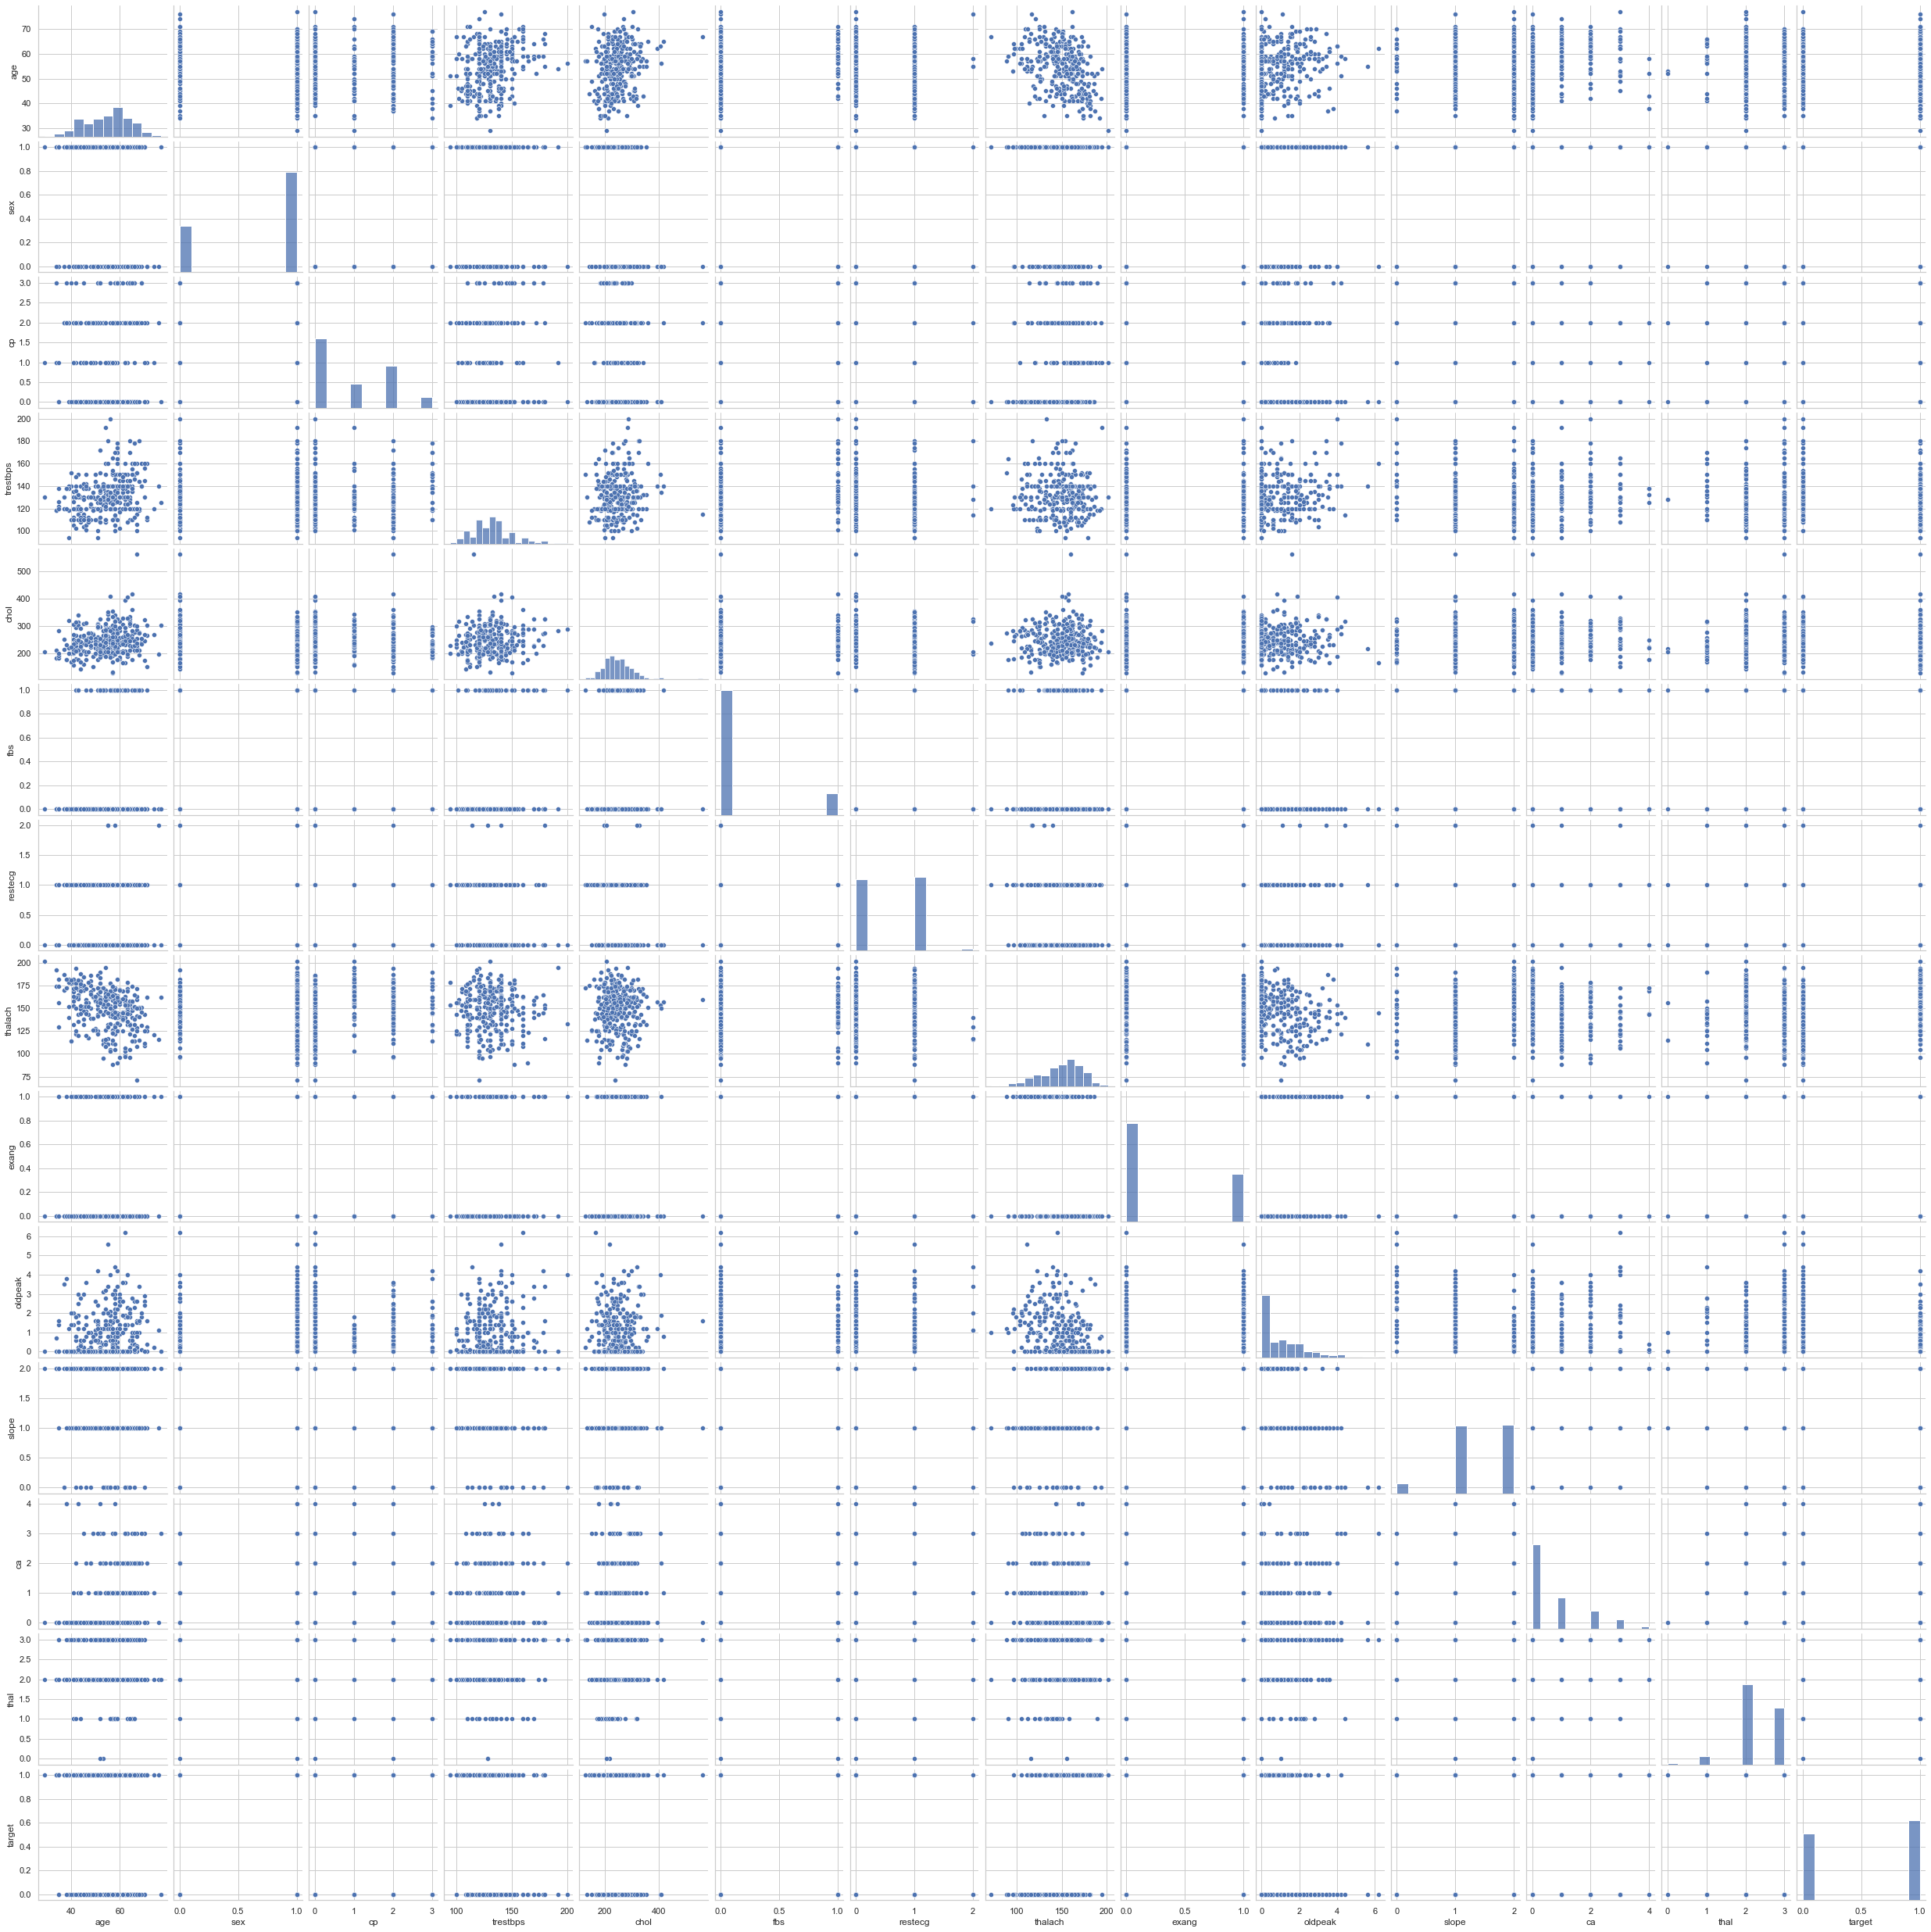

In [34]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

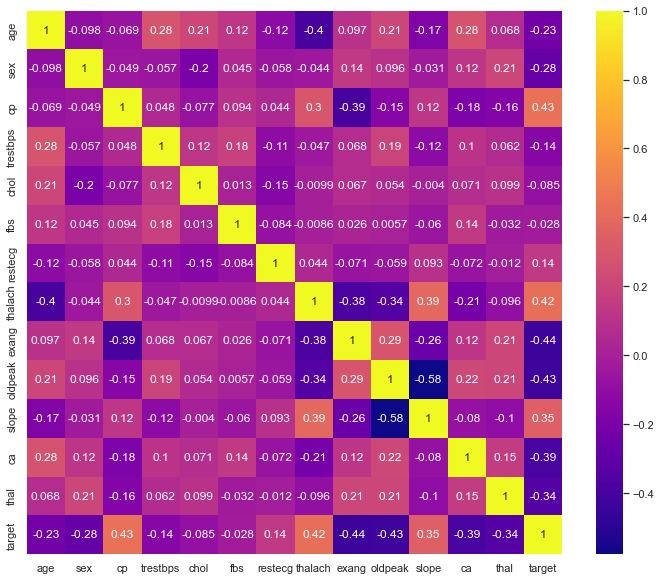

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

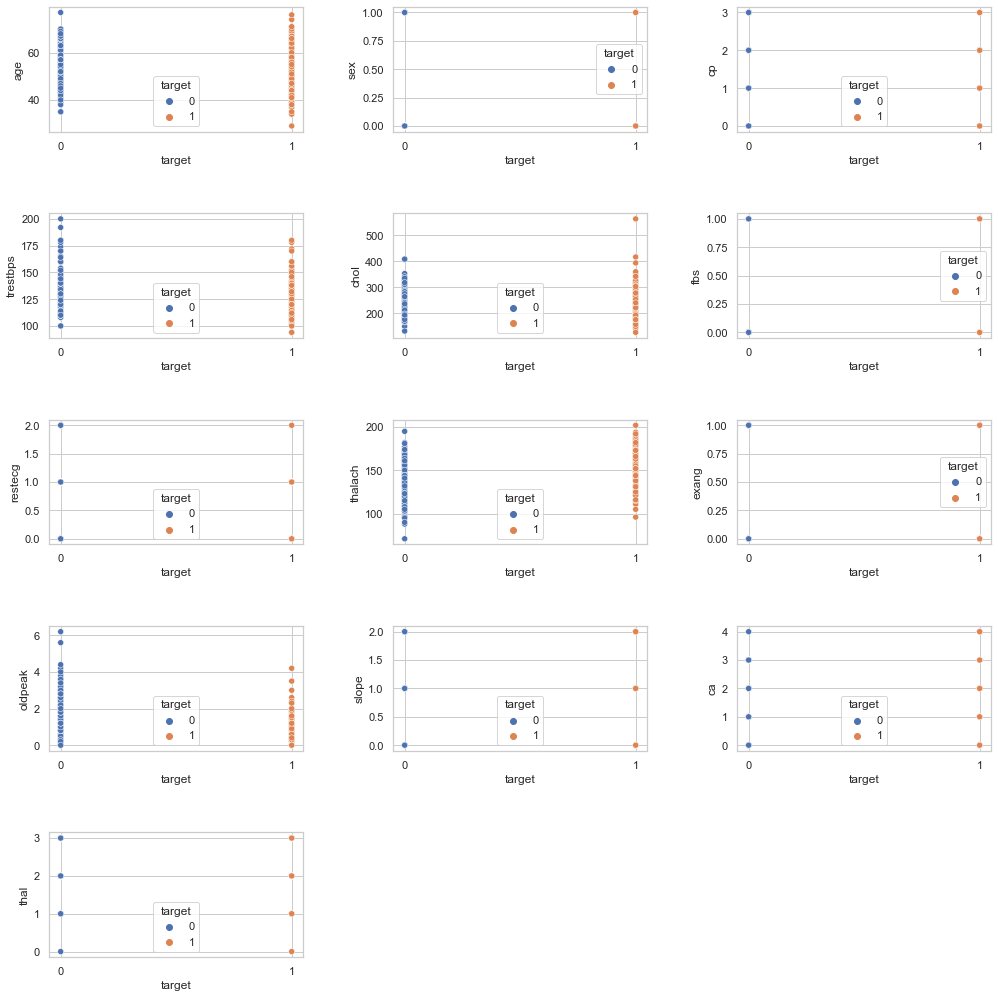

In [36]:
plt.figure(figsize=(15,15))
for i in range(len(df.columns)-1):
    plt.subplot(5,3,i+1)
    sns.scatterplot(df['target'],df[df.columns[i]],hue=df['target'])
    plt.xticks([0,1])
plt.tight_layout(pad=4.0)

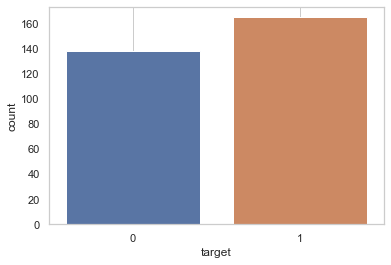

In [37]:
sns.countplot(df['target'],data=df)
plt.grid()

In [39]:
from mpl_toolkits.mplot3d import Axes3D


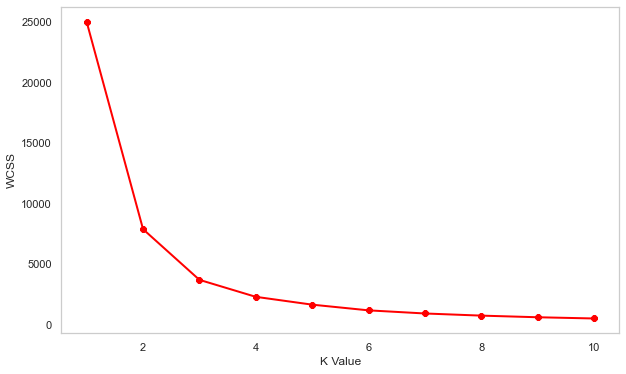

In [41]:
x1=df.loc[:,['age','restecg']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [42]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 1 1 3 3 3 3 1 0 3 0 0 0 2 3 0 3 2 1 2 3 1 1 3 1 2 3 0 2 0 1 2 1 0 0 1 0
 0 2 2 0 0 1 0 1 0 1 0 0 0 0 2 3 1 3 0 0 1 1 3 2 0 0 1 3 1 0 1 1 3 0 0 1 0
 1 0 0 3 0 3 1 1 3 0 1 2 2 1 0 3 0 3 0 0 1 0 3 0 1 0 1 3 3 1 0 2 2 1 0 0 2
 3 2 1 0 1 1 3 1 1 2 3 1 0 1 1 0 2 0 2 0 0 1 1 1 0 3 3 3 2 0 1 1 2 2 2 1 3
 1 1 2 2 2 2 1 3 0 1 3 3 3 0 1 1 1 2 2 3 3 0 3 0 3 3 3 1 3 2 1 3 0 2 3 3 0
 1 3 0 0 1 0 3 0 3 3 3 1 2 3 2 1 3 3 2 3 0 3 3 0 3 3 3 1 3 3 1 3 3 2 0 3 0
 2 3 0 2 3 1 3 2 0 3 0 2 2 0 3 3 2 1 2 3 2 3 3 0 3 2 0 2 0 1 3 2 3 1 3 0 3
 1 2 0 0 3 0 2 0 0 0 3 1 3 2 3 0 0 3 3 3 3 1 0 3 1 3 1 3 3 3 0 3 3 3 2 1 3
 3 3 3 1 2 3 3]


In [43]:
print(kmeans.cluster_centers_)

[[51.62962963  0.58024691]
 [41.64788732  0.61971831]
 [67.1372549   0.47058824]
 [59.1         0.45      ]]


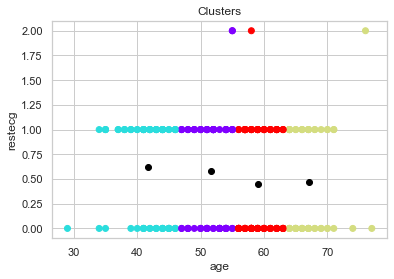

In [46]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters')
plt.xlabel('age')
plt.ylabel('restecg')
plt.show()

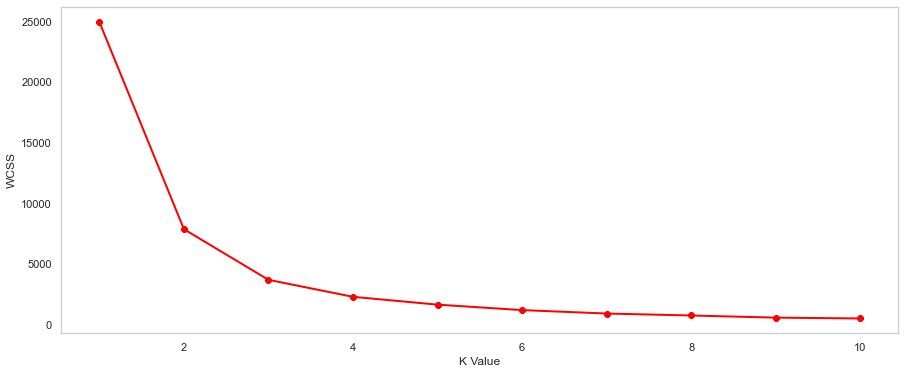

In [48]:
x2=df.loc[:,['age','target']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [49]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[3 1 1 0 0 0 0 2 4 0 4 2 4 3 0 4 0 3 2 3 0 2 2 0 1 3 0 4 3 4 1 3 2 4 4 2 4
 4 3 3 4 2 2 4 1 4 2 2 4 4 4 3 0 2 3 4 2 2 1 0 3 4 4 1 0 1 4 2 2 0 4 4 1 4
 2 4 4 0 4 0 1 2 0 4 2 3 3 2 4 0 2 0 4 4 2 4 0 4 2 4 2 0 3 2 4 3 3 2 4 4 3
 0 3 2 4 1 1 0 2 2 3 0 1 4 1 1 2 3 4 3 4 4 2 1 1 4 0 0 0 3 4 2 2 3 3 3 2 0
 2 2 3 3 3 3 1 0 2 1 0 0 0 4 1 1 1 3 3 0 3 4 0 2 0 0 0 1 0 3 2 0 4 3 0 0 4
 2 0 4 4 1 4 0 4 0 0 0 2 3 0 3 2 0 0 3 0 4 0 0 4 0 0 0 1 0 0 2 0 3 3 2 3 4
 3 0 4 3 0 1 0 3 2 0 4 3 3 4 0 0 3 1 3 0 3 0 0 2 0 3 4 3 4 2 0 3 0 2 0 4 0
 1 3 4 4 3 4 3 4 4 4 0 2 0 3 0 2 4 0 0 0 0 2 4 0 1 0 2 0 0 0 4 0 0 0 3 2 3
 3 0 0 2 3 0 0]


In [50]:
print(kmeans.cluster_centers_)

[[58.71428571  0.35164835]
 [38.31034483  0.75862069]
 [44.75925926  0.68518519]
 [66.51666667  0.5       ]
 [52.33333333  0.63768116]]


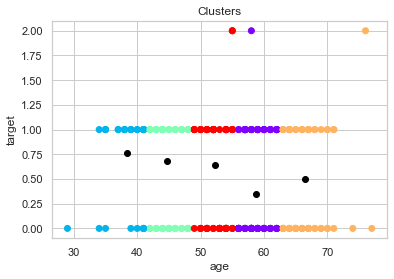

In [51]:
plt.scatter(x2[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters')
plt.xlabel('age')
plt.ylabel('target')
plt.show()

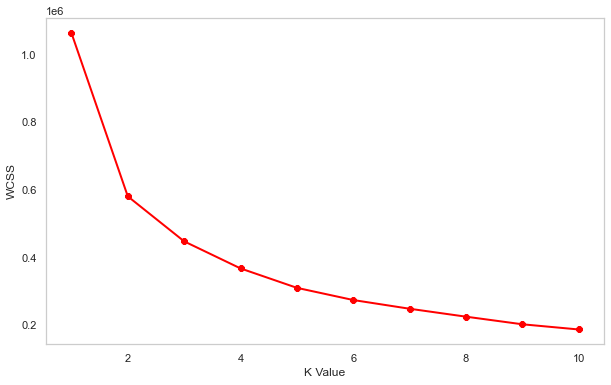

In [52]:
x3=df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [53]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)

[2 2 0 2 1 0 1 2 0 0 2 4 2 0 1 2 1 4 2 2 2 2 2 4 0 1 0 0 3 0 0 0 2 2 0 0 1
 2 4 1 1 2 0 4 1 1 2 2 0 2 2 1 2 0 2 0 2 2 0 1 4 1 0 0 0 0 2 2 2 0 2 2 2 2
 0 2 2 2 0 2 2 1 1 1 4 3 1 0 0 4 2 0 2 1 0 4 3 2 1 2 2 4 0 2 0 0 4 2 2 2 1
 0 1 0 2 2 2 0 0 2 1 2 2 2 0 2 0 1 0 4 0 2 1 2 1 2 0 0 0 4 1 1 0 2 0 4 2 2
 2 0 4 0 2 1 2 0 2 0 0 2 2 1 0 0 0 4 4 2 2 0 4 2 1 2 0 0 2 1 0 4 1 4 1 2 4
 1 2 4 2 0 1 0 0 1 0 1 2 2 4 2 0 4 4 4 0 2 2 2 0 0 2 4 0 1 2 1 4 1 4 2 3 4
 1 4 4 0 4 0 1 1 2 4 1 4 1 1 1 1 1 1 4 4 0 4 0 2 3 4 1 2 1 2 4 1 4 1 4 0 2
 2 2 2 4 2 0 0 1 0 4 4 2 2 4 2 4 0 4 4 1 0 1 0 0 2 0 1 0 2 1 0 0 1 2 0 0 0
 0 0 4 4 0 0 2]


In [54]:
print(kmeans.cluster_centers_)

[[ 7.30337079e-01  1.01123596e+00  1.28067416e+02  1.92247191e+02
   1.57303371e-01  6.40449438e-01  1.48033708e+02  3.03370787e-01
   1.03483146e+00  1.41573034e+00  6.40449438e-01  2.20224719e+00
   5.95505618e-01]
 [ 5.83333333e-01  8.66666667e-01  1.35316667e+02  3.08516667e+02
   1.33333333e-01  5.16666667e-01  1.53050000e+02  3.66666667e-01
   1.01000000e+00  1.51666667e+00  8.00000000e-01  2.35000000e+00
   4.83333333e-01]
 [ 7.14285714e-01  1.13265306e+00  1.28765306e+02  2.41000000e+02
   1.32653061e-01  5.20408163e-01  1.63571429e+02  2.14285714e-01
   7.65306122e-01  1.48979592e+00  6.63265306e-01  2.29591837e+00
   6.63265306e-01]
 [-1.11022302e-16  8.00000000e-01  1.35800000e+02  4.38200000e+02
   2.00000000e-01 -1.11022302e-16  1.55600000e+02  2.00000000e-01
   1.90000000e+00  1.20000000e+00  1.20000000e+00  2.60000000e+00
   6.00000000e-01]
 [ 7.25490196e-01  7.05882353e-01  1.38568627e+02  2.58588235e+02
   1.76470588e-01  4.11764706e-01  1.21117647e+02  5.49019608e-01


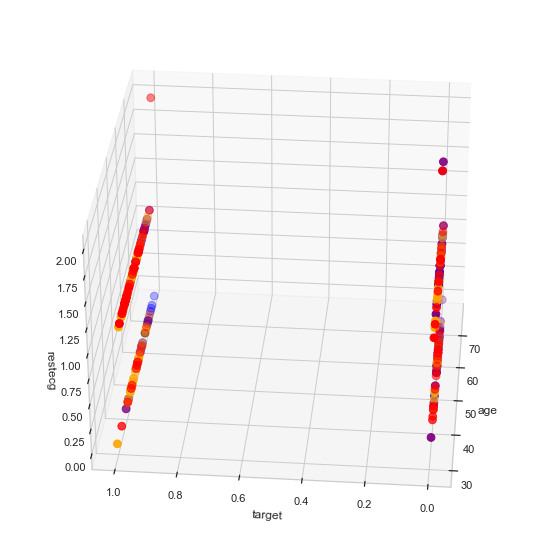

In [56]:
clusters=kmeans.fit_predict(x3)
df['label']=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.age[df.label==0],df['target'][df.label==0],df['restecg'][df.label==0],c='blue',s=60)
ax.scatter(df.age[df.label==1],df['target'][df.label==1],df['restecg'][df.label==1],c='red',s=60)
ax.scatter(df.age[df.label==2],df['target'][df.label==2],df['restecg'][df.label==2],c='green',s=60)
ax.scatter(df.age[df.label==3],df['target'][df.label==3],df['restecg'][df.label==3],c='orange',s=60)
ax.scatter(df.age[df.label==4],df['target'][df.label==4],df['restecg'][df.label==4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel('age')
plt.ylabel('target')
ax.set_zlabel('restecg')
plt.show()

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.drop('target',axis=1)
Y=df['target']
df=sc.fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=3)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [113]:
def model(X_train,y_train):
    models=[]
    
    lr=LogisticRegression(max_iter=1000)
    lr.fit(X_train,y_train)
    models.append(lr)
    
    tree=DecisionTreeClassifier(random_state=42)
    tree.fit(X_train,y_train)
    models.append(tree)
    
    svm=SVC(kernel='rbf', gamma=0.1, C=1.0)
    svm.fit(X_train,y_train)
    models.append(svm)
    
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    models.append(knn)
    
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    models.append(rfc)
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    models.append(nb)
    
    return models

In [114]:
models=model(X_train,y_train)

In [115]:
from sklearn.metrics import accuracy_score
train_accuracy=[]
test_accuracy=[]

for i in range(6):
    yhat=models[i].predict(X_test)
    yhat_t=models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t,y_train))
    test_accuracy.append(accuracy_score(yhat,y_test))

In [116]:
Model=['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','RandomForestClassifier','GaussianNB']

In [117]:
Accuracy_score=pd.DataFrame({ 
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [118]:
Accuracy_score

,Model,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.854626,0.881579
1,DecisionTreeClassifier,1.000000,0.750000
2,SVC,1.000000,0.605263
3,KNeighborsClassifier,0.775330,0.631579
4,RandomForestClassifier,1.000000,0.855263
5,GaussianNB,0.828194,0.881579


In [119]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) 
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])}

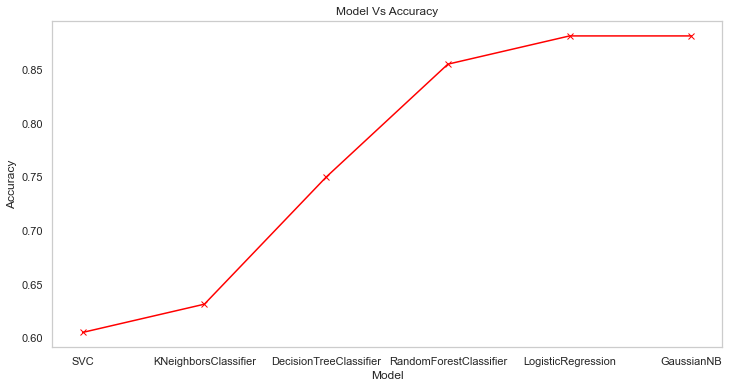

In [120]:
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()

In [121]:
from sklearn.metrics import accuracy_score
def model(X_train, y_train, X_test, y_test):
    models = []
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    models.append(lr)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    models.append(tree)
    svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
    svm.fit(X_train, y_train)
    models.append(svm)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    models.append(knn)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    models.append(rfc)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    models.append(nb)
    return models
models = model(X_train, y_train, X_test, y_test)
train_accuracy = []
test_accuracy = []
for i in range(6):
    yhat = models[i].predict(X_test)
    yhat_t = models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t, y_train))
    test_accuracy.append(accuracy_score(yhat, y_test))
Model = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB']
Accuracy_score = pd.DataFrame({
    'Model': Model,
    'Train_Accuracy': train_accuracy,
    'Test_Accuracy': test_accuracy
})
for i in range(len(Model)):
    print(f'{Model[i]} Test Accuracy: {test_accuracy[i]:.4f}')


LogisticRegression Test Accuracy: 0.8816
DecisionTreeClassifier Test Accuracy: 0.7500
SVC Test Accuracy: 0.6053
KNeighborsClassifier Test Accuracy: 0.6316
RandomForestClassifier Test Accuracy: 0.8158
GaussianNB Test Accuracy: 0.8816


In [122]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1) 
y = df['target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = LogisticRegression(max_iter=1000) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.25%
